In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

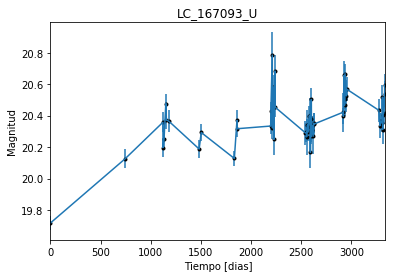

In [5]:
data = np.genfromtxt('LC_167093_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_167093_U')
plt.savefig("LC_167093_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

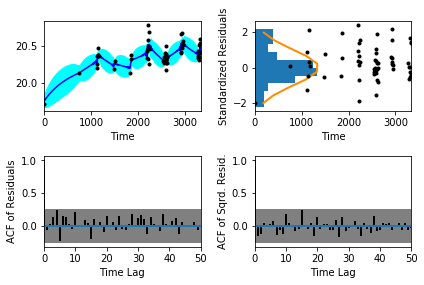

In [6]:
sample.assess_fit()

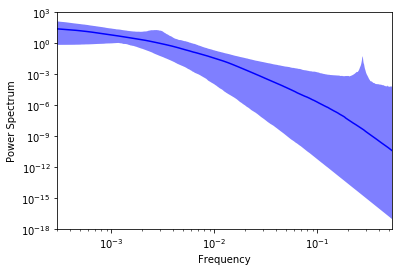

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

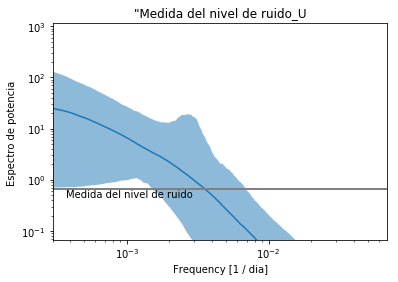

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_167093_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_167093_U')

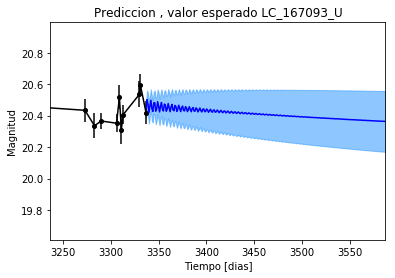

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_167093_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_167093_U')

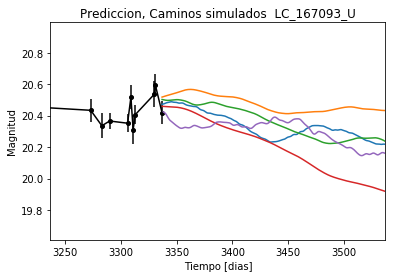

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_167093_U')

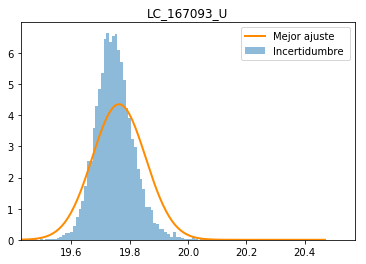

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_167093_U')
plt.savefig("Mejor_ajuste_LC_167093_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_167093_U')

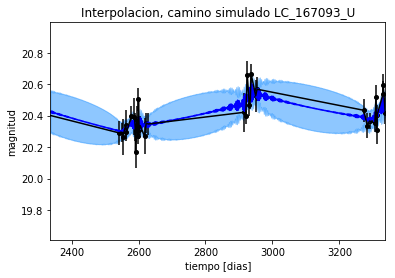

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_U')

Text(0.5,1,'Interpolacion, camino simulado LC_167093_U')

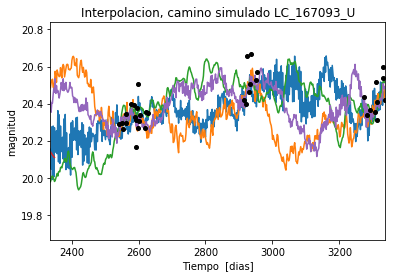

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_U')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 603.880166836
Median: 0.00921152323503
Standard deviation: 0.183943369218
68% credibility interval: [ 0.00100371  0.15711426]
95% credibility interval: [  3.63650613e-04   7.23978818e-01]
99% credibility interval: [  3.12090901e-04   9.67556417e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1479.0543873
Median: 0.00286377912867
Standard deviation: 0.0742225877411
68% credibility interval: [ 0.0004799   0.03024336]
95% credibility interval: [ 0.00032328  0.21897947]
99% credibility interval: [  3.05592734e-04   5.31747947e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 509.23968596
Median: 0.0427081422351
Standard d

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 464.252270669
Median: 64.8878193344
Standard deviation: 1.98786750355
68% credibility interval: [ 63.04706133  66.36127431]
95% credibility interval: [ 60.67282122  69.00591359]
99% credibility interval: [ 58.84890585  70.87810744]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 614.039401389
Median: 0.87757053782
Standard deviation: 2.20245059119
68% credibility interval: [ 0.08164083  4.26698503]
95% credibility interval: [ 0.01657583  7.31737698]
99% credibility interval: [ 0.01046227  9.88223469]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 669.721857313
Median: 0.863101775652
Standard deviation: 9.2509140068
68% credibility interval: [ 0.02582493  9.05539051]
95% credibility interval: [  1.48028701e-03 

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 839.481472242
Median: 1.47804309411e-35
Standard deviation: 4.00764370853e+40
68% credibility interval: [  3.05000740e-75   5.72260057e-11]
95% credibility interval: [  8.51442171e-128   4.22285636e+000]
99% credibility interval: [  4.56374477e-146   2.63830492e+040]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2266.14271394
Median: 20.2434371479
Standard deviation: 0.119669203724
68% credibility interval: [ 20.13210784  20.34080068]
95% credibility interval: [ 19.98074641  20.45607544]
99% credibility interval: [ 19.85771162  20.57081537]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 386.084714311
Median: 0.0254309484392
Standard deviation: 0.251611004955
68% credibility interval: [ 0.          0.37441815]
95% credibility interval: [ 0.         0.8808274]
99% credibility interval: [ 0.          1.03111792]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 386.084714311
Median: 0.0254309484392
Standard deviation: 0.251611004955
68% credibility interval: [ 0.          0.37441815]
95% credibility interval: [ 0.         0.8808274]
99% credibility interval: [ 0.          1.03111792]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 375.458489621
Median: 0.0
Standard deviation: 0.00101077808996
68% credibi

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 464.252270669
Median: 64.8878193344
Standard deviation: 1.98786750355
68% credibility interval: [ 63.04706133  66.36127431]
95% credibility interval: [ 60.67282122  69.00591359]
99% credibility interval: [ 58.84890585  70.87810744]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1475.70068332
Median: 0.058584521809
Standard deviation: 0.0583335440671
68% credibility interval: [ 0.03583526  0.10481341]
95% credibility interval: [ 0.02332496  0.21755399]
99% credibility interval: [ 0.01916877  0.38451171]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 483.687503259
Median: 1.29010294807
Standard deviation: 0.219139963796
68% credibility interval: [ 1.08586221  1.52526343]
95% credibility interval: [ 0.9053581   1.76832146]
99% credibility interval: [ 0.69765977  1.89585636]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 424.66294548
Median: 0.000769202764432
Standard deviation: 0.374508337025
68% credibility interval: [  8.07949913e-06   5.12714567e-02]
95% credibility interval: [  1.03688100e-07   1.08065523e+00]
99% credibility interval: [  4.85165510e-44   2.25521519e+00]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 603.880166836
Median: (-0.0578777074471-2.92118800875j)
Standard deviation: 1.95833148905
68% credibility interval: [-0.98717801-0.26188738j -0.00630651-2.7835747j ]
95% credibility interval: [ -4.54889307e+00+0.j          -2.28488419e-03-1.51642216j]
99% credibility interval: [ -6.07933626e+00+0.j          -1.96092496e-03-0.01878126j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1479.0543873
Median: (-0.0179936549443+0.815597180415j)
Standard deviation: 1.64826873749
68% credibility interval: [-0.19002463+3.39192967j -0.00301532+0.36010997j]
95% credibility interval: [-1.37588861+3.4024725j -0.00203123+0.j       ]
99% credibility interval: [ -3.34107089e+00+1.3716299j  -1.92009578e-03+0.j       ]
Posterior summary 